# Atividade:

b. Gere aleatoriamente 1000 valores para a variável X e outros 1000 para a variável Y e execute as seguintes operações:

1) Calcule a média, a mediana, a moda, a variância e o desvio padrão de cada variável;

2) Plote o histograma de cada variável e use-o para interpretar o significado de cada uma das medidas calculadas em 1;

3) 

4) Calcule as matrizes de covariância e de correlação e descreva o que cada uma representa.

5)

## Imports and Visualization Functions Definitions

In [0]:
# let's starting importing funny libs

import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd

In [0]:
# Let's code some visualization functions

def my_hist_plot(data_sequence,data_sequence_name, bins, facecolor, x_lim):
  n, bins, patches = plt.hist(data_sequence, bins, facecolor = facecolor)
  plt.xlim((x_lim[0],x_lim[1]))
  #plt.ylim((y_lim[0],y_lim[1]))
  plt.title(data_sequence_name)

def hist_both_step(ds1,ds2,ds1_name, ds2_name, bins):
  '''
  Plot both histograms, but in the same graph.

  Inputs:
    ds1: first data sequence
    ds2: second data sequence
    ds1_name: first data sequence label to be showed
    ds2_name: second data sequence label to be showed
    bins: how many bins to have

  Returns: None

  '''

  fig, ax = plt.subplots()
  ax.hist(ds1, bins, None, ec='red', fc='none', lw=1.5, histtype='stepfilled', label=ds1_name)
  ax.hist(ds2, bins, None, ec='green', fc='none', lw=1.5, histtype='stepfilled', label=ds2_name)
  ax.legend(loc='upper left')
  plt.show()

def hist_both_fill(ds1,ds2,ds1_name, ds2_name, bins, fill= 0.5):
  '''
  Plot both histograms, but in the same graph.

  Inputs:
    ds1: first data sequence
    ds2: second data sequence
    ds1_name: first data sequence label to be showed
    ds2_name: second data sequence label to be showed
    bins: how many bins to have
    fill: a number between 0 and 1 to indicate how much filled must be the graph (0 - no filled; 1 - completely filled)

  Returns: None

  '''
  plt.hist(ds1, bins, alpha= fill, label=ds1_name)
  plt.hist(ds2, bins, alpha= fill, label=ds2_name)
  plt.legend(loc='upper right')
  plt.show()  
  

## Defining the Data

In [0]:
# in order to have some reproductibility

np.random.seed(0)

In [0]:
muX, sigmaX = 0, 1 # 1/3 = 3
muY, sigmaY = 10, 1.67 # 3* 1.67 ~ 5

decimal_places = 2

X = muX + sigmaX * np.random.randn(1000)
X = np.round(X,decimal_places)

Y = muY + sigmaY * np.random.randn(1000)
Y = np.round(Y,decimal_places)

## Data Parameters Table (b.1)

In [0]:
# first, let's collect the data in the form of a numpy array

# be careful with the stats.mode() function! In order to get a single value, the axis argument must be passed.
# I want just the numerical value. So, let's get the item in the first position.

data = np.array([[X.mean(), np.median(X), stats.mode(X,axis=None)[0].item(), X.var(), X.std()],
                 [Y.mean(), np.median(Y), stats.mode(Y,axis=None)[0].item(), Y.var(), Y.std()]]).transpose()

# the indexes (line names) are the values we are looking for 

indexes = ['mean', 'median', 'mode', 'variance', 'standard deviation']

# setting the dataframe...

data_df = pd.DataFrame(data, index=indexes, columns=['X','Y'])

# calling the dataframe

data_df

,X,Y
mean,-0.045210,10.022780
median,-0.060000,10.040000
mode,0.400000,9.330000
variance,0.974127,2.614158
standard deviation,0.986979,1.616836


With the previous dataframe (i.e., the table), we can check out that the mean and standard deviation are correct. They almost equals the set values!

## Histograms Visualization and Comparison (b.2)

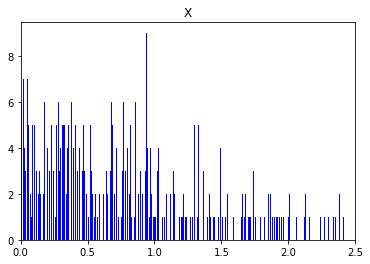

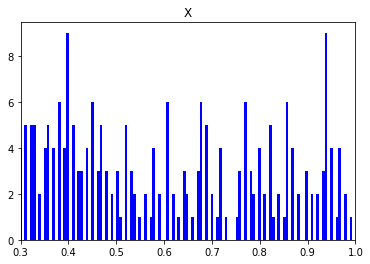

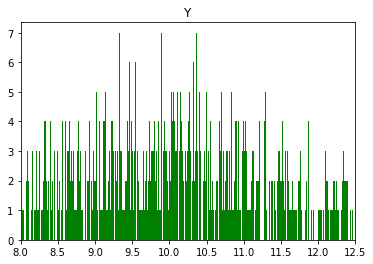

In [0]:
Xx_lim = [0,2.5]
Yx_lim= [8,12.5]
plt.figure(0)
my_hist_plot(X,'X',1000,'b',Xx_lim)
plt.figure(1)
my_hist_plot(X,'X',1000,'b',[0.3,1])
plt.figure(2)
my_hist_plot(Y,'Y',1000,'g',Yx_lim)

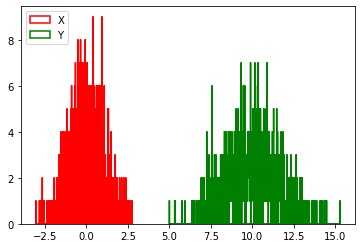

In [0]:
hist_both_step(X,Y,'X','Y',1000)

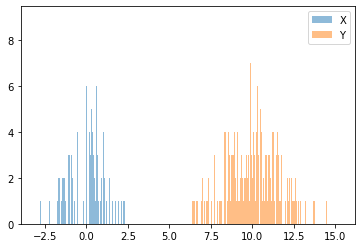

In [0]:
hist_both_fill(X, Y, 'X', 'Y', 1000)

From the histograms above, we can understand visually some concepts. 

* The _Mean_ gives us the information of where the histogram must be centered. For the X distribution, it's in 0.0, for the Y one, it happens in 10.0.

* _Standard Deviation_ (std) is a measure of how disperse the data is. We can see the data from Y is more distributed than X's. Numerically, we defined ```std(X) = 1``` and ```std(Y) = 1.67``` (```std(Y) > std(X)```). From the graph, we can "guess" the values of ```std```. That's because of the [**Three Sigma Rule of Thumb**](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule). It states that aprox. 99% of data is concentrated inside the boundaries of three times the std around the mean, for and approximate normal distribution. Well... ```3*1.67 ~ 5``` and for Y we see the data concentrated around ```10.0``` goes near ```5.0``` and ```15.0```. For X distribution, the data around 0.0 goes from ```~-3.0``` to ```~3.0```.

* The _Median_ [separates the data in two halves](https://en.wikipedia.org/wiki/Median). We can check out the graph and compare with the numerical values.

Other concepts to be analized:

* _Variance_ is defined as the _Standard Deviation_ squared.

* The _Mode_ [is the value where the histogram reaches its peak](https://en.wikipedia.org/wiki/Mode_(statistics)#Mode_of_a_sample). For some reason, the numerical value that appears in the table doesn't match the graph. 


## Covariance and Correlation Matrices (b.4)

In [0]:
data_sequence = np.array([X.tolist(), Y.tolist()])

In [0]:
np.cov(data_sequence)

array([[ 0.97510226, -0.05052014],
       [-0.05052014,  2.61677445]])

In [0]:
cor = np.corrcoef(X,Y)
cor

array([[ 1.        , -0.03162688],
       [-0.03162688,  1.        ]])

As can be seen, the [covariance](https://en.wikipedia.org/wiki/Covariance_matrix) in the main diagonal equals the table values we found before.

The [correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)  of X and Y together approaches 0. This makes sense, since the data is aproximally random. They have nothing to do with one another. It's also negative, so the correlation found varies in opposite ways (when the first sequence increases, the second one decreases, and vice-versa).

##Testing...